# WASM -  Análise Estatiscas

Análise dos dados de execução do processamento de detecção de faces compilados com WebAssembly versus compilação nativa com visual C++. O objetivo desta pesqusias em constatar a diferença de performance entre um código compilado p/ WebAssembly e outro com compilaçção nativa.

## Ferramentas para analise

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

## Dados de testes

O conjunto de dados de teste é formado por três vídeos selecionados a partir do *site* YouTube.
Os critérios de seleção foram: ser um video de acesso publico, ou seja, sem restrições para reprodução e estar 
disponível em formato MPEG-4 com resolução padrão de 1920px por 1080px.

In [2]:
df_dataset = pd.read_csv('./data/dataset.csv')
df_dataset

,id,extension,resolution,frames,fps,youtube_link
0,DATASET1,mp4,1920x1080,3915,24,https://www.youtube.com/watch?v=EWUdGRAwUpY
1,DATASET2,mp4,1920x1080,3020,30,https://www.youtube.com/watch?v=vQtLX6pW5eA
2,DATASET3,mp4,1920x1080,12296,50,https://www.youtube.com/watch?v=RuL5jVqc4Tg


## Resultados

Foram feitos testes com uma aplicação nativa usado o Windows10 e com WebAssembly usando Chrome 75 e Firefox 67 executando no mesmo sistema operacional e maquina fisica com as configuraçãoes padrão de instalação. 

In [3]:
df_meta_fd = pd.read_csv('./data/META_LOG_FACE_DETECT.csv')
df_meta_fd

,workload,dataset,resolution,system,total_frames,total_frames_processeds,test_total_time_ms,log_file


## Carregar dados de teste




In [4]:
#dataset_1
df_d1sc = pd.read_csv('./data/LOG_FACE_DETECT_DATASET1_SMALL_Chrome_92_Linux.csv')
df_d1mc = pd.read_csv('./data/LOG_FACE_DETECT_DATASET1_MEDIUM_Chrome_92_Linux.csv')
df_d1lc = pd.read_csv('./data/LOG_FACE_DETECT_DATASET1_LARGE_Chrome_92_Linux.csv')
df_d1sf = pd.read_csv('./data/LOG_FACE_DETECT_DATASET1_SMALL_Firefox_91_UNIX.csv')
df_d1mf = pd.read_csv('./data/LOG_FACE_DETECT_DATASET1_MEDIUM_Firefox_91_UNIX.csv')
df_d1lf = pd.read_csv('./data/LOG_FACE_DETECT_DATASET1_LARGE_Firefox_91_UNIX.csv')
df_d1swin = pd.read_csv('./data/LOG_FACE_DETECT_DATASET1_SMALL_LINUX.csv')
df_d1mwin = pd.read_csv('./data/LOG_FACE_DETECT_DATASET1_MEDIUM_LINUX.csv')
df_d1lwin = pd.read_csv('./data/LOG_FACE_DETECT_DATASET1_LARGE_LINUX.csv')

#dataset_2
df_d2sc = pd.read_csv('./data/LOG_FACE_DETECT_DATASET2_SMALL_Chrome_92_Linux.csv')
df_d2mc = pd.read_csv('./data/LOG_FACE_DETECT_DATASET2_MEDIUM_Chrome_92_Linux.csv')
df_d2lc = pd.read_csv('./data/LOG_FACE_DETECT_DATASET2_LARGE_Chrome_92_Linux.csv')
df_d2sf = pd.read_csv('./data/LOG_FACE_DETECT_DATASET2_SMALL_Firefox_91_UNIX.csv')
df_d2mf = pd.read_csv('./data/LOG_FACE_DETECT_DATASET2_MEDIUM_Firefox_91_UNIX.csv')
df_d2lf = pd.read_csv('./data/LOG_FACE_DETECT_DATASET2_LARGE_Firefox_91_UNIX.csv')
df_d2swin = pd.read_csv('./data/LOG_FACE_DETECT_DATASET2_SMALL_LINUX.csv')
df_d2mwin = pd.read_csv('./data/LOG_FACE_DETECT_DATASET2_MEDIUM_LINUX.csv')
df_d2lwin = pd.read_csv('./data/LOG_FACE_DETECT_DATASET2_LARGE_LINUX.csv')

#dataset_3
df_d3sc = pd.read_csv('./data/LOG_FACE_DETECT_DATASET3_SMALL_Chrome_92_Linux.csv')
df_d3mc = pd.read_csv('./data/LOG_FACE_DETECT_DATASET3_MEDIUM_Chrome_92_Linux.csv')
df_d3lc = pd.read_csv('./data/LOG_FACE_DETECT_DATASET3_LARGE_Chrome_92_Linux.csv')
df_d3sf = pd.read_csv('./data/LOG_FACE_DETECT_DATASET3_SMALL_Firefox_91_UNIX.csv')
df_d3mf = pd.read_csv('./data/LOG_FACE_DETECT_DATASET3_MEDIUM_Firefox_91_UNIX.csv')
df_d3lf = pd.read_csv('./data/LOG_FACE_DETECT_DATASET3_LARGE_Firefox_91_UNIX.csv')
df_d3swin = pd.read_csv('./data/LOG_FACE_DETECT_DATASET3_SMALL_LINUX.csv')
df_d3mwin = pd.read_csv('./data/LOG_FACE_DETECT_DATASET3_MEDIUM_LINUX.csv')
df_d3lwin = pd.read_csv('./data/LOG_FACE_DETECT_DATASET3_LARGE_LINUX.csv')

frames_ds1 =[df_d1sc, df_d1mc, df_d1lc, df_d1sf, df_d1mf, df_d1lf, df_d1swin, df_d1mwin, df_d1lwin]
df_ds1 = pd.concat(frames_ds1, sort=False)
frames_ds2 =[df_d2sc, df_d2mc, df_d2lc, df_d2sf, df_d2mf, df_d2lf, df_d2swin, df_d2mwin, df_d2lwin]
df_ds2 = pd.concat(frames_ds2, sort=False)
frames_ds3 =[df_d3sc, df_d3mc, df_d3lc, df_d3sf, df_d3mf, df_d3lf, df_d3swin, df_d3mwin, df_d3lwin]
df_ds3 = pd.concat(frames_ds3, sort=False)

In [5]:
print('DATASET1', df_ds1['id'].count(), 'DATASET2', df_ds2['id'].count(), 'DATASET3', df_ds3['id'].count())
print('TOTAL', df_ds1['id'].count() + df_ds2['id'].count() + df_ds3['id'].count())

DATASET1 1467 DATASET2 909 DATASET3 2214
TOTAL 4590


## Selecionar dados de teste

O criterio de uniformização dos dados é considerar apenas as medições que tiveram o mesmo numero de rostos detectados,
para fazer isso é necessario identificar qual a quantidade de rostos detectados mais comuns que seja diferente de zero.

In [6]:
ds1_faces_detected_rank = df_ds1[df_ds1["faces_detected"] > 0]['faces_detected'].value_counts()
ds2_faces_detected_rank = df_ds2[df_ds2["faces_detected"] > 0]['faces_detected'].value_counts()
ds3_faces_detected_rank = df_ds3[df_ds3["faces_detected"] > 0]['faces_detected'].value_counts()
print("DATASET1 - Rank com a quantidade mais comum de rostos detectados:")
print(ds1_faces_detected_rank)
print("DATASET2 - Rank com a quantidade mais comum de rostos detectados:")
print(ds2_faces_detected_rank)
print("DATASET3 - Rank com a quantidade mais comum de rostos detectados:")
print(ds3_faces_detected_rank)

DATASET1 - Rank com a quantidade mais comum de rostos detectados:
1    639
2    202
3     15
Name: faces_detected, dtype: int64
DATASET2 - Rank com a quantidade mais comum de rostos detectados:
1    285
2    134
3     23
4      4
5      2
Name: faces_detected, dtype: int64
DATASET3 - Rank com a quantidade mais comum de rostos detectados:
1    929
2    324
3    230
4     74
5      8
7      1
Name: faces_detected, dtype: int64


In [7]:
#dataset_1
df_ds1 = df_ds1[df_ds1["faces_detected"] == ds1_faces_detected_rank.head(1).index[0]]
df_ds1 = df_ds1.drop(columns=['id','workload','faces_detected','eyes_detected','workload'])

#dataset_2
df_ds2 = df_ds2[df_ds2["faces_detected"] == ds2_faces_detected_rank.head(1).index[0]]
df_ds2 = df_ds2.drop(columns=['id','workload','faces_detected','eyes_detected','workload'])

#dataset_3
df_ds3 = df_ds3[df_ds3["faces_detected"] == ds3_faces_detected_rank.head(1).index[0]]
df_ds3 = df_ds3.drop(columns=['id','workload','faces_detected','eyes_detected','workload'])

frames_ds123 =[df_ds1, df_ds2, df_ds3]
df_ds = pd.concat(frames_ds123, sort=False)

print('DATASET1', df_ds1['dataset'].count(), 
      'DATASET2', df_ds2['dataset'].count(), 
      'DATASET3', df_ds3['dataset'].count())
print('TOTAL', df_ds1['dataset'].count() + df_ds2['dataset'].count() + df_ds3['dataset'].count())
print('TOTAL df_ds', df_ds['dataset'].count())

DATASET1 639 DATASET2 285 DATASET3 929
TOTAL 1853
TOTAL df_ds 1853


In [8]:
## Constantes

CHROME='Chrome_92_Linux'
FIREFOX='Firefox_91_UNIX'
NATIVO='LINUX'
CHROME_L='Chrome'
FIREFOX_L='Firefox'
NATIVO_L='Linux'

## Funções uteis

def get_col(dfds, system, res, col):
    data_col = dfds[dfds["system"] == system]
    data_col = data_col[data_col["resolution_label"] == res]
    data_col = data_col.loc[:,[col]]
    return data_col

def get_df_process_time(dfds, res):
    crhome_process_time = get_col(dfds, CHROME, res, 'process_time_ms').rename(columns = {'process_time_ms':CHROME_L})
    firefox_process_time = get_col(dfds, FIREFOX, res, 'process_time_ms').rename(columns = {'process_time_ms':FIREFOX_L})
    linux_process_time = get_col(dfds, NATIVO, res, 'process_time_ms').rename(columns = {'process_time_ms':NATIVO_L})
    frames = crhome_process_time.join(firefox_process_time)
    frames = frames.join(linux_process_time)
    return frames


## Aalise Estatística

**Analise Geral dos datasets unificados**

### DATASET 1 2  e 3 - ANALISE DE OUTLIERS


#### RESOLUÇÂO SMALL

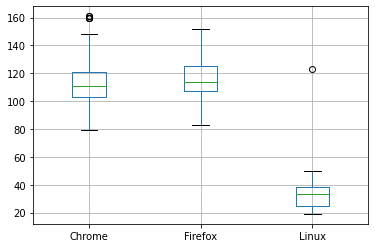

In [11]:
df_proc_small = get_df_process_time(df_ds,'SMALL')
boxplot_small = df_proc_small.boxplot()

#### RESOLUÇÃO MEDIUM

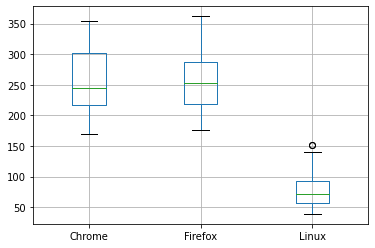

In [12]:
df_proc_medium = get_df_process_time(df_ds,'MEDIUM')
boxplot_medium = df_proc_medium.boxplot()

#### RESOLUÇÂO LARGE

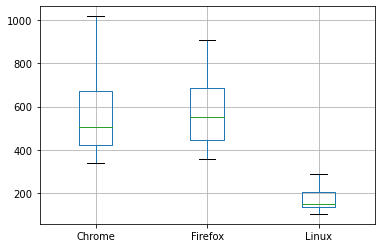

In [13]:
df_proc_large = get_df_process_time(df_ds,'LARGE')
boxplot_large = df_proc_large.boxplot()

#### REMOVENDO OUTLIERS

In [14]:
stats_small = df_proc_small.describe()
stats_medium = df_proc_medium.describe()
stats_large = df_proc_large.describe()
print(stats_small)
print(stats_medium)
print(stats_large)

stats = {'SMALL':stats_small, 'MEDIUM':stats_medium, 'LARGE':stats_large}

def get_lim_sup(res, system_label):
    std = stats[res].loc['std'][system_label]
    q3 = stats[res].loc['75%'][system_label]
    return q3 + 1.5*std

def get_lim_inf(res, system_label):
    std = stats[res].loc['std'][system_label]
    q1 = stats[res].loc['25%'][system_label]
    return q1 - 1.5*std

lim_sup_s_c = get_lim_sup('SMALL', CHROME_L);
lim_sup_m_c = get_lim_sup('MEDIUM', CHROME_L);
lim_sup_l_c = get_lim_sup('LARGE', CHROME_L);

lim_sup_s_f = get_lim_sup('SMALL', FIREFOX_L);
lim_sup_m_f = get_lim_sup('MEDIUM', FIREFOX_L);
lim_sup_l_f = get_lim_sup('LARGE', FIREFOX_L);

lim_sup_s_n = get_lim_sup('SMALL', NATIVO_L);
lim_sup_m_n = get_lim_sup('MEDIUM', NATIVO_L);
lim_sup_l_n = get_lim_sup('LARGE', NATIVO_L);

lim_inf_s_c = get_lim_inf('SMALL', CHROME_L);
lim_inf_m_c = get_lim_inf('MEDIUM', CHROME_L);
lim_inf_l_c = get_lim_inf('LARGE', CHROME_L);

lim_inf_s_f = get_lim_inf('SMALL', FIREFOX_L);
lim_inf_m_f = get_lim_inf('MEDIUM', FIREFOX_L);
lim_inf_l_f = get_lim_inf('LARGE', FIREFOX_L);

lim_inf_s_n = get_lim_inf('SMALL', NATIVO_L);
lim_inf_m_n = get_lim_inf('MEDIUM', NATIVO_L);
lim_inf_l_n = get_lim_inf('LARGE', NATIVO_L);

print(lim_sup_m_n)


           Chrome     Firefox       Linux
count  323.000000  257.000000  297.000000
mean   113.900929  117.486381   31.939394
std     16.335651   15.619524   10.244133
min     79.000000   83.000000   19.000000
25%    103.000000  107.000000   25.000000
50%    111.000000  114.000000   33.000000
75%    121.000000  125.000000   38.000000
max    161.000000  152.000000  123.000000
           Chrome     Firefox       Linux
count  431.000000  357.000000  379.000000
mean   257.387471  261.221289   74.649077
std     50.040270   49.928418   21.935953
min    170.000000  176.000000   39.000000
25%    216.500000  218.000000   57.000000
50%    245.000000  253.000000   71.000000
75%    302.000000  288.000000   92.000000
max    354.000000  362.000000  152.000000
            Chrome     Firefox       Linux
count   368.000000  293.000000  332.000000
mean    558.307065  580.699659  174.457831
std     156.710204  150.534249   46.978378
min     340.000000  357.000000  105.000000
25%     424.000000  446.00000

In [15]:
def remove_outliers(df_ds_copy, res, system, lim_sup, lim_inf):
    df_ds_s = df_ds_copy[(df_ds_copy["resolution_label"] == res) 
                & (df_ds_copy["system"] == system) 
                & ((df_ds_copy['process_time_ms'] > lim_sup)
                | (df_ds_copy['process_time_ms'] < lim_inf))]
    index = df_ds_s.index
    df_ds_copy = df_ds_copy.drop(index=index)
    return df_ds_copy

df_ds = remove_outliers(df_ds, 'SMALL', CHROME, lim_sup_s_c, lim_inf_s_c)
df_ds = remove_outliers(df_ds, 'SMALL', FIREFOX, lim_sup_s_f, lim_inf_s_f)
df_ds = remove_outliers(df_ds, 'SMALL', NATIVO, lim_sup_s_n, lim_inf_s_n)

df_ds = remove_outliers(df_ds, 'MEDIUM', CHROME, lim_sup_m_c, lim_inf_m_c)
df_ds = remove_outliers(df_ds, 'MEDIUM', FIREFOX, lim_sup_m_f, lim_inf_m_f)
df_ds = remove_outliers(df_ds, 'MEDIUM', NATIVO, lim_sup_m_n, lim_inf_m_n)

df_ds = remove_outliers(df_ds, 'LARGE', CHROME, lim_sup_l_c, lim_inf_l_c)
df_ds = remove_outliers(df_ds, 'LARGE', FIREFOX, lim_sup_l_f, lim_inf_l_f)
df_ds = remove_outliers(df_ds, 'LARGE', NATIVO, lim_sup_l_n, lim_inf_l_n)

df_ds

,dataset,process_time_ms,pre_time_ms,tag_time_ms,pos_time_ms,total_time_ms,system,resolution_label
3,DATASET1,103,0,0,0,109,Chrome_92_Linux,SMALL
5,DATASET1,105,0,0,0,111,Chrome_92_Linux,SMALL
7,DATASET1,102,0,0,0,108,Chrome_92_Linux,SMALL
8,DATASET1,115,0,0,0,121,Chrome_92_Linux,SMALL
10,DATASET1,114,0,0,0,120,Chrome_92_Linux,SMALL
...,...,...,...,...,...,...,...,...
215,DATASET3,139,2,0,1,143,LINUX,LARGE
218,DATASET3,161,2,0,1,165,LINUX,LARGE
229,DATASET3,155,2,0,1,159,LINUX,LARGE
234,DATASET3,148,2,0,1,152,LINUX,LARGE


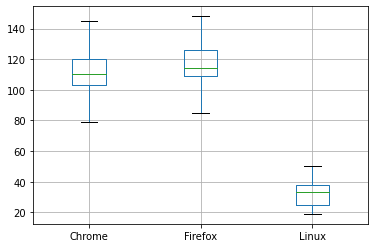

In [16]:
df_proc_small = get_df_process_time(df_ds,'SMALL')
boxplot_small = df_proc_small.boxplot()

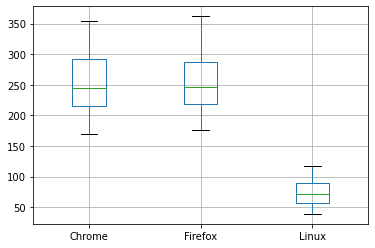

In [17]:
df_proc_medium = get_df_process_time(df_ds,'MEDIUM')
boxplot_medium = df_proc_medium.boxplot()

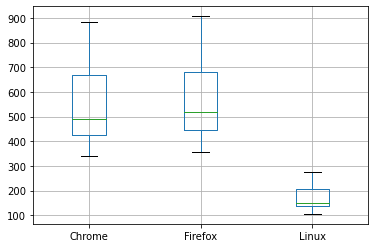

In [18]:
df_proc_large = get_df_process_time(df_ds,'LARGE')
boxplot_large = df_proc_large.boxplot()

### Dados de teste - Geral (DATASET1, DATASET2, DATASET3)

In [19]:
#dataset,process_time_ms,pre_time_ms,tag_time_ms,pos_time_ms,total_time_ms,system,resolution_label
df_ds_group = df_ds.groupby(['dataset','system', 'resolution_label'])
df_ds_group[['total_time_ms']].agg(['count'])

total_time_ms
                                                  count
dataset  system          resolution_label              
DATASET1 Chrome_92_Linux LARGE                       60
                         MEDIUM                      63
                         SMALL                       55
         Firefox_91_UNIX LARGE                       63
                         MEDIUM                      67
                         SMALL                       56
         LINUX           LARGE                       59
                         MEDIUM                      59
                         SMALL                       63
DATASET2 Chrome_92_Linux LARGE                       23
                         MEDIUM                      34
                         SMALL                       21
         Firefox_91_UNIX LARGE                       27
                         MEDIUM                      28
                         SMALL                       14
         LINUX           LARGE                       33
                         MEDIUM                      32
                         SMALL                       21
DATASET3 Chrome_92_Linux LARGE                      103
                         MEDIUM                     102
                         SMALL                       89
         Firefox_91_UNIX LARGE                       83
                         MEDIUM                     101
                         SMALL                       91
         LINUX           LARGE                       89
                         MEDIUM                     103
                         SMALL                       98

In [26]:
#dataset,process_time_ms,pre_time_ms,tag_time_ms,pos_time_ms,total_time_ms,system,resolution_label
df_ds_group = df_ds.groupby(['system', 'resolution_label'])
df_ds_st = df_ds_group[
    ['process_time_ms','pre_time_ms','tag_time_ms','pos_time_ms','total_time_ms']
].agg([np.mean, np.median])
df_ds_st

process_time_ms        pre_time_ms         \
                                            mean median        mean median   
system          resolution_label                                             
Chrome_92_Linux LARGE                 536.881720  477.0    2.322581    2.0   
                MEDIUM                253.085427  242.0    0.919598    1.0   
                SMALL                 112.387879  110.0    0.000000    0.0   
Firefox_91_UNIX LARGE                 566.763006  536.0    3.387283    3.0   
                MEDIUM                251.602041  234.0    1.260204    1.0   
                SMALL                 116.012422  113.0    0.490683    0.0   
LINUX           LARGE                 171.729282  151.0    2.000000    2.0   
                MEDIUM                 73.597938   71.5    0.000000    0.0   
                SMALL                  32.467033   34.0    0.000000    0.0   

                                 tag_time_ms        pos_time_ms         \
                                        mean median        mean median   
system          resolution_label                                         
Chrome_92_Linux LARGE               0.000000    0.0         0.0    0.0   
                MEDIUM              0.000000    0.0         0.0    0.0   
                SMALL               0.000000    0.0         0.0    0.0   
Firefox_91_UNIX LARGE               0.075145    0.0         0.0    0.0   
                MEDIUM              0.086735    0.0         0.0    0.0   
                SMALL               0.031056    0.0         0.0    0.0   
LINUX           LARGE               0.000000    0.0         1.0    1.0   
                MEDIUM              0.000000    0.0         0.0    0.0   
                SMALL               0.000000    0.0         0.0    0.0   

                                 total_time_ms         
                                          mean median  
system          resolution_label                       
Chrome_92_Linux LARGE               576.096774  509.5  
                MEDIUM              269.231156  258.0  
                SMALL               119.884848  118.0  
Firefox_91_UNIX LARGE               581.404624  544.0  
                MEDIUM              259.219388  241.0  
                SMALL               119.347826  117.0  
LINUX           LARGE               175.668508  155.0  
                MEDIUM               74.319588   72.5  
                SMALL                32.945055   34.0

## Analise de Performance de Todas as Fase de Processamento

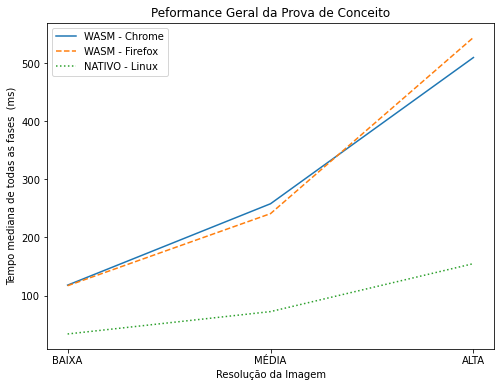

Nativo resolution_label
SMALL      34.0
MEDIUM     72.5
LARGE     155.0
Name: median, dtype: float64
Wams Firefox resolution_label
SMALL     117.0
MEDIUM    241.0
LARGE     544.0
Name: median, dtype: float64
Wams Chrome resolution_label
SMALL     118.0
MEDIUM    258.0
LARGE     509.5
Name: median, dtype: float64
Comparação Nativo x Firefox: -2.424997273659186
Comparação Chrome x Firefox: 0.002217534861973236


In [27]:
total_c = df_ds_st.loc['Chrome_92_Linux']['total_time_ms']['median'].sort_values()
total_f = df_ds_st.loc['Firefox_91_UNIX']['total_time_ms']['median'].sort_values()
total_w = df_ds_st.loc['LINUX']['total_time_ms']['median'].sort_values()
activity = ["BAIXA", "MÉDIA", "ALTA"]

plt.rcParams["figure.figsize"] = (8,6)

linestyles = ['-', '--', '-.', ':']

fig, ax1 = plt.subplots()
ax1.plot(activity, total_c, label="WASM - " + CHROME_L, linestyle=linestyles[0])
ax1.plot(activity, total_f, label="WASM - " + FIREFOX_L,linestyle=linestyles[1])
ax1.plot(activity, total_w, label="NATIVO - " + NATIVO_L,linestyle=linestyles[3])
ax1.legend()

plt.xlabel('Resolução da Imagem')
plt.ylabel('Tempo mediana de todas as fases  (ms)')
plt.title("Peformance Geral da Prova de Conceito")
plt.legend()

plt.show()

print("Nativo", total_w)
print("Wams Firefox", total_f)
print("Wams Chrome", total_c)
print("Comparação Nativo x Firefox:", ((((total_w - total_f) * 100)/total_w)/100).mean())
print("Comparação Chrome x Firefox:", ((((total_c - total_f) * 100)/total_c)/100).mean())

## Analise de Performance de Pré-Processamento

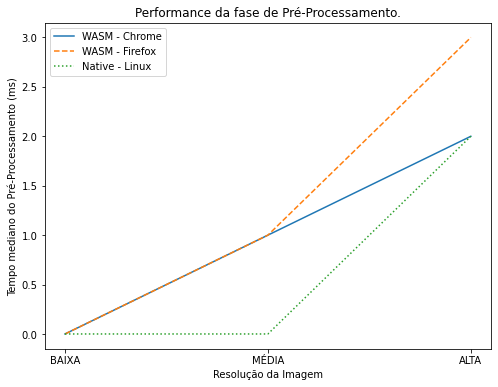

Nativo resolution_label
MEDIUM    0.0
SMALL     0.0
LARGE     2.0
Name: median, dtype: float64
Wams Firefox resolution_label
SMALL     0.0
MEDIUM    1.0
LARGE     3.0
Name: median, dtype: float64
Wams Chrome resolution_label
SMALL     0.0
MEDIUM    1.0
LARGE     2.0
Name: median, dtype: float64
Comparação Chrome x Nativo: 0.5
Comparação Chrome x Firefox: -0.25


In [22]:
pre_c = df_ds_st.loc['Chrome_92_Linux']['pre_time_ms']['median'].sort_values()
pre_f = df_ds_st.loc['Firefox_91_UNIX']['pre_time_ms']['median'].sort_values()
pre_w = df_ds_st.loc['LINUX']['pre_time_ms']['median'].sort_values()
activity = ["BAIXA", "MÉDIA", "ALTA"]

fig, ax = plt.subplots()
ax.plot(activity, pre_c, label="WASM - "+ CHROME_L,linestyle=linestyles[0])
ax.plot(activity, pre_f, label="WASM - "+ FIREFOX_L,linestyle=linestyles[1])
ax.plot(activity, pre_w, label="Native - "+ NATIVO_L ,linestyle=linestyles[3])
ax.legend()

plt.xlabel('Resolução da Imagem')
plt.ylabel('Tempo mediano do Pré-Processamento (ms)')
plt.title("Performance da fase de Pré-Processamento.")
plt.legend()

plt.show()

print("Nativo", pre_w)
print("Wams Firefox", pre_f)
print("Wams Chrome", pre_c)
print("Comparação Chrome x Nativo:", ((((pre_c - pre_w) * 100)/pre_c)/100).median())
print("Comparação Chrome x Firefox:", ((((pre_c - pre_f) * 100)/pre_c)/100).median())

## Analise de Performance do Processamento prioncipal - Detecção de Faces

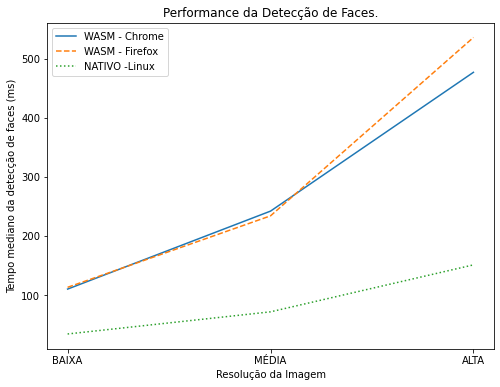

Nativo resolution_label
SMALL     110.0
MEDIUM    242.0
LARGE     477.0
Name: median, dtype: float64
Wams Firefox resolution_label
SMALL     113.0
MEDIUM    234.0
LARGE     536.0
Name: median, dtype: float64
Wams Chrome resolution_label
SMALL     110.0
MEDIUM    242.0
LARGE     477.0
Name: median, dtype: float64
Comparação Nativo x Firefox: -2.3235294117647056
Comparação Firefox x Chrome: 0.02654867256637168


In [23]:
pro_c = df_ds_st.loc['Chrome_92_Linux']['process_time_ms']['median'].sort_values()
pro_f = df_ds_st.loc['Firefox_91_UNIX']['process_time_ms']['median'].sort_values()
pro_w = df_ds_st.loc['LINUX']['process_time_ms']['median'].sort_values()
activity = ["BAIXA", "MÉDIA", "ALTA"]

fig, ax = plt.subplots()
ax.plot(activity, pro_c, label="WASM - "+CHROME_L,linestyle=linestyles[0])
ax.plot(activity, pro_f, label="WASM - "+FIREFOX_L,linestyle=linestyles[1])
ax.plot(activity, pro_w, label="NATIVO -"+NATIVO_L,linestyle=linestyles[3])
ax.legend()

plt.xlabel('Resolução da Imagem')
plt.ylabel('Tempo mediano da detecção de faces (ms)')
plt.title("Performance da Detecção de Faces.")
plt.legend()

plt.show()

print("Nativo", pro_c)
print("Wams Firefox", pro_f)
print("Wams Chrome", pro_c)
print("Comparação Nativo x Firefox:", ((((pro_w - pro_f) * 100)/pro_w)/100).median())
print("Comparação Firefox x Chrome:", ((((pro_f - pro_c) * 100)/pro_f)/100).median())

## Analise de Performance da marcação de faces na imagem

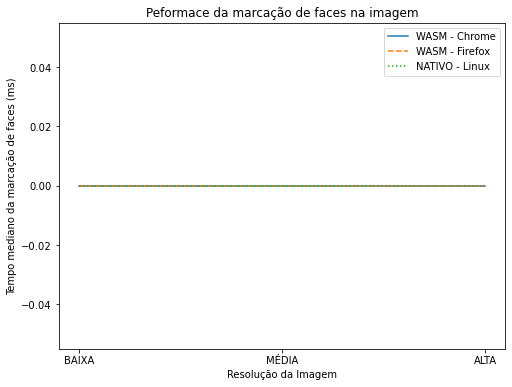

Nativo resolution_label
LARGE     0.0
MEDIUM    0.0
SMALL     0.0
Name: median, dtype: float64
Wams Firefox resolution_label
LARGE     0.0
MEDIUM    0.0
SMALL     0.0
Name: median, dtype: float64
Wams Chrome resolution_label
LARGE     0.0
MEDIUM    0.0
SMALL     0.0
Name: median, dtype: float64
Comparação Nativo x Firefox: nan
Comparação Firefox x Chrome: nan


In [24]:
pro_c = df_ds_st.loc['Chrome_92_Linux']['tag_time_ms']['median'].sort_values()
pro_f = df_ds_st.loc['Firefox_91_UNIX']['tag_time_ms']['median'].sort_values()
pro_w = df_ds_st.loc['LINUX']['tag_time_ms']['median'].sort_values()
activity = ["BAIXA", "MÉDIA", "ALTA"]

fig, ax = plt.subplots()
ax.plot(activity, pro_c, label="WASM - "+CHROME_L,linestyle=linestyles[0])
ax.plot(activity, pro_f, label="WASM - "+FIREFOX_L,linestyle=linestyles[1])
ax.plot(activity, pro_w, label="NATIVO - "+NATIVO_L,linestyle=linestyles[3])
ax.legend()

plt.xlabel('Resolução da Imagem')
plt.ylabel('Tempo mediano da marcação de faces (ms)')
plt.title("Peformace da marcação de faces na imagem")
plt.legend()

plt.show()

print("Nativo", pro_c)
print("Wams Firefox", pro_f)
print("Wams Chrome", pro_c)
print("Comparação Nativo x Firefox:", ((((pro_w - pro_f) * 100)/pro_w)/100).median())
print("Comparação Firefox x Chrome:", ((((pro_f - pro_c) * 100)/pro_f)/100).median())

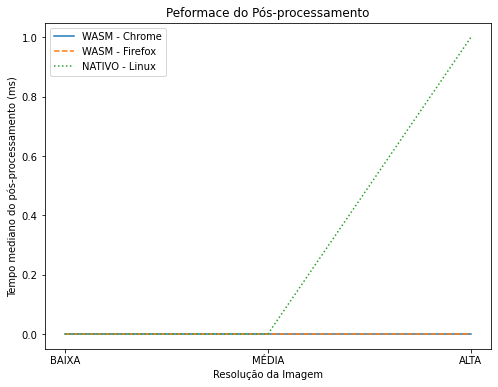

Nativo resolution_label
LARGE     0.0
MEDIUM    0.0
SMALL     0.0
Name: median, dtype: float64
Wams Firefox resolution_label
LARGE     0.0
MEDIUM    0.0
SMALL     0.0
Name: median, dtype: float64
Wams Chrome resolution_label
LARGE     0.0
MEDIUM    0.0
SMALL     0.0
Name: median, dtype: float64
Comparação Nativo x Firefox: 1.0
Comparação Firefox x Chrome: nan


In [25]:
pro_c = df_ds_st.loc['Chrome_92_Linux']['pos_time_ms']['median'].sort_values()
pro_f = df_ds_st.loc['Firefox_91_UNIX']['pos_time_ms']['median'].sort_values()
pro_w = df_ds_st.loc['LINUX']['pos_time_ms']['median'].sort_values()
activity = ["BAIXA", "MÉDIA", "ALTA"]

fig, ax = plt.subplots()
ax.plot(activity, pro_c, label="WASM - "+CHROME_L,linestyle=linestyles[0])
ax.plot(activity, pro_f, label="WASM - "+FIREFOX_L,linestyle=linestyles[1])
ax.plot(activity, pro_w, label="NATIVO - "+NATIVO_L,linestyle=linestyles[3])
ax.legend()

plt.xlabel('Resolução da Imagem')
plt.ylabel('Tempo mediano do pós-processamento (ms)')
plt.title("Peformace do Pós-processamento")
plt.legend()

plt.show()

print("Nativo", pro_c)
print("Wams Firefox", pro_f)
print("Wams Chrome", pro_c)
print("Comparação Nativo x Firefox:", ((((pro_w - pro_f) * 100)/pro_w)/100).median())
print("Comparação Firefox x Chrome:", ((((pro_f - pro_c) * 100)/pro_f)/100).median())